In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

# Load dataset from Excel file
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

data['English'] = data['English'].apply(preprocess_text)

# Assuming 'English' column for English text and 'Category' column for classification labels
X_text = data['English']
y = data['Hindi']

# Feature Extraction: Convert English text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Logistic Regression with class_weight for imbalanced classes
model = LogisticRegression(class_weight='balanced', C=0.5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.011419249592169658


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

data['English'] = data['English'].apply(preprocess_text)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['English'])

# Convert target variable to numerical if it's categorical
le = LabelEncoder()
y = le.fit_transform(data['Hindi'])  # Convert text to numerical labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = reg.predict(X_train)

# Make predictions on the test data
y_test_pred = reg.predict(X_test)

# Calculate MSE (Mean Squared Error)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAPE (Mean Absolute Percentage Error) while avoiding division by zero
non_zero_indices_train = y_train != 0
non_zero_indices_test = y_test != 0

mape_train = np.mean(np.abs((y_train[non_zero_indices_train] - y_train_pred[non_zero_indices_train]) / y_train[non_zero_indices_train])) * 100
mape_test = np.mean(np.abs((y_test[non_zero_indices_test] - y_test_pred[non_zero_indices_test]) / y_test[non_zero_indices_test])) * 100

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train MAPE: {mape_train:.4f}, Test MAPE: {mape_test:.4f}")
print(f"Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")


Train MSE: 174011.6702, Test MSE: 1658036.9819
Train RMSE: 417.1471, Test RMSE: 1287.6478
Train MAPE: 79.9934, Test MAPE: 239.8583
Train R2: 0.7667, Test R2: -1.3112


In [21]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Assuming you have a column named 'Text' containing the text data for clustering
text_data = data['Hindi']  # Replace 'Text' with the actual column name

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')  # Customize parameters as needed
X = vectorizer.fit_transform(text_data)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)

# Get cluster labels and centers
print("Cluster labels:", kmeans.labels_)
print("Cluster centers (TF-IDF features):", kmeans.cluster_centers_)


Cluster labels: [1 1 1 ... 1 1 1]
Cluster centers (TF-IDF features): [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00029503 0.00023355 0.00594311 ... 0.00034855 0.00034855 0.00034855]]


In [23]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Load the dataset
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Combine the two text columns into a single column
text_data = data['Hindi']

# Convert the combined text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')  # Customize parameters as needed
X = vectorizer.fit_transform(text_data)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

# Calculate Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X.toarray(), labels)
print(f"Calinski-Harabasz Score: {ch_score}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X.toarray(), labels)
print(f"Davies-Bouldin Index: {db_score}")


Silhouette Score: 0.01795361382776409
Calinski-Harabasz Score: 34.43191397632013
Davies-Bouldin Index: 4.386210210522036


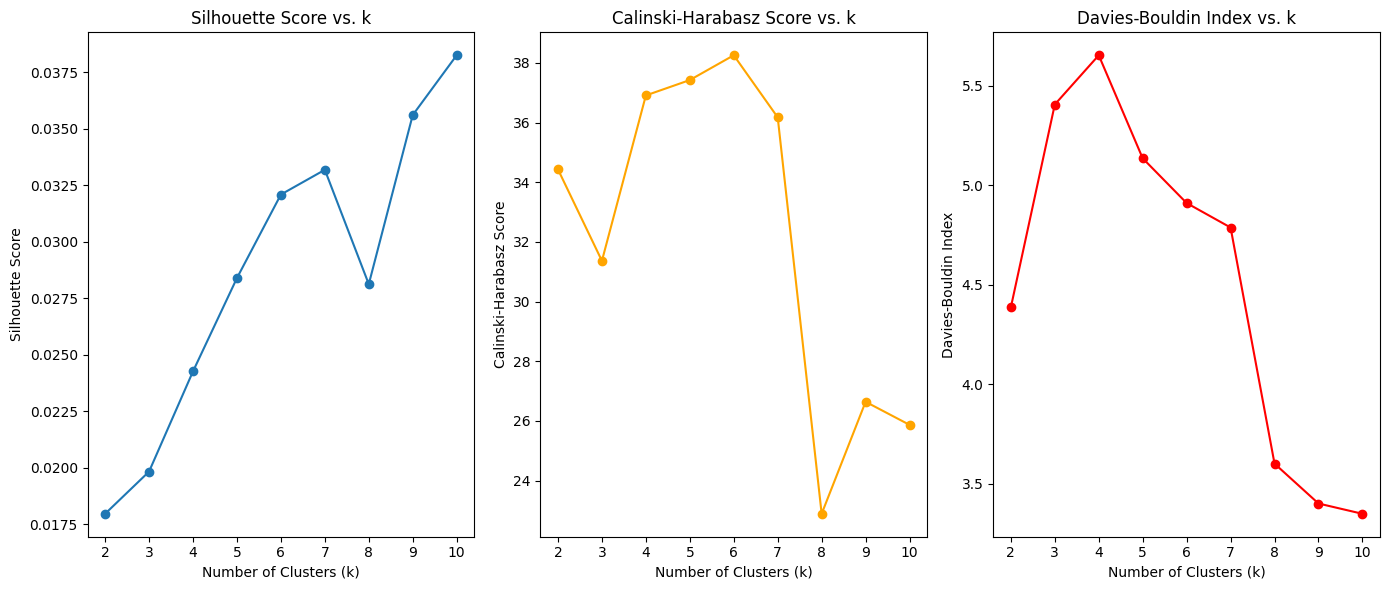

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Combine the text columns into a single column
text_data = data['Hindi']

# Convert the combined text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')  # Customize parameters as needed
X = vectorizer.fit_transform(text_data)

# Initialize lists to store the scores
silhouette_scores = []
ch_scores = []
db_scores = []
k_values = range(2, 11)  # Example range of k values

# Loop through different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X)
    labels = kmeans.labels_

    # Calculate the metrics
    silhouette = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X.toarray(), labels)
    db_score = davies_bouldin_score(X.toarray(), labels)
    
    silhouette_scores.append(silhouette)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


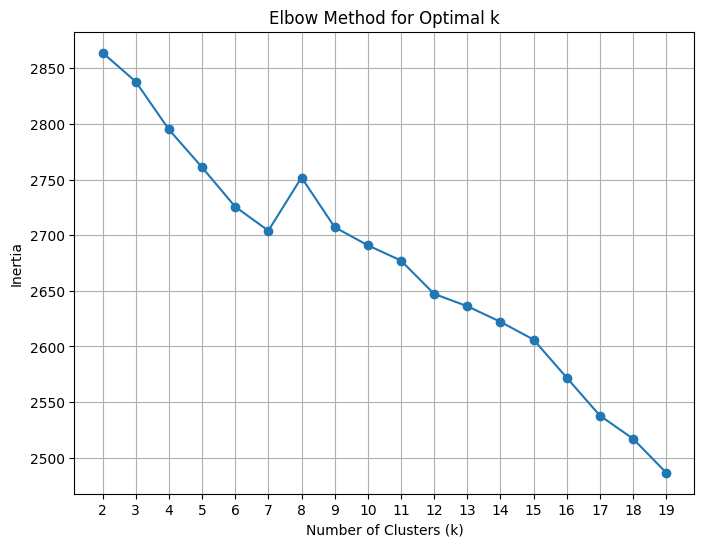

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\akuus\Desktop\ml_db.xlsx"
data = pd.read_excel(file_path)

# Combine the text columns into a single column
text_data = data['Hindi']

# Convert the combined text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Initialize a list to store distortions (inertia) for each k
distortions = []

# Loop through different values of k to calculate inertia
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X)
    distortions.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()
